<a href="https://colab.research.google.com/github/G750cloud/20MA573/blob/master/HW6(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back

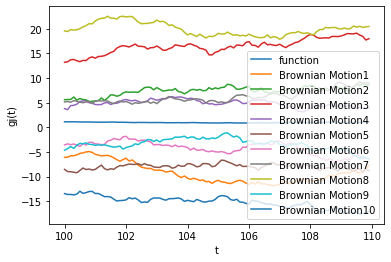

In [0]:
import numpy as np
import matplotlib.pyplot as plt
h = 0.1
def BM(n):
    gj = []
    gj2 = []
    i = 0
    sum = 0
    while i<n:
        gj.append(sum)
        AA = sum/np.sqrt(2*(h*i)*np.log(np.log(h*i)))
        gj2.append(AA)
        sum = sum+np.sqrt(h)*np.random.randn(1)[0]
        i = i+1
    return([gj,gj2])

x_co = [100+h*i for i in list(range(100))]
plt.plot(x_co, BM(1100)[1][-100:], label = 'function')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion1')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion2')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion3')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion4')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion5')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion6')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion7')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion8')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion9')
plt.plot(x_co, BM(1100)[0][-100:], label = 'Brownian Motion10')

plt.xlabel('t')
plt.ylabel('gj(t)')
plt.legend()

    

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
    
    def explain_yourself(self):
      if self.otype==1:
        print('I am call')
      elif self.otype==-1:
        print('I am put')

        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])



class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2,
                 nstep=5,
                 N = 1000
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.nstep = nstep
        self.N = N

    def asianprice(self,VanillaOption):
        r = self.drift_ratio
        sigma = self.vol_ratio
        n = self.nstep
        N = self.N
        s0 = self.init_state
        K = VanillaOption.strike
        T = VanillaOption.maturity
        Optiontype = VanillaOption.otype
        
        W=[]
        X=[]
        sum = 0
        sum2 = 0
        CT = 0
        AA = 0
        i=0
        while i<N:
            h = T/n
            W.append(sum)
            AA=s0*np.exp(h*i*(r-0.5*np.square(sigma))+sigma*W[i])
            sum2 = sum2+AA
            X.append(AA)
            sum = sum+np.sqrt(h)*np.random.randn(1)[0]
            ave = sum2/N
            CT = CT+np.exp(-r*h*i*np.max([ave-K, 0]))
            i=i+1
        return(CT/N)

gbm1 = Gbm()
option1 = VanillaOption()
print('The price of Arithmetic Asian call option is ')
gbm1.asianprice(option1)       
        
            
           
            

            
           
           

The price of Arithmetic Asian call option is 


0.15107020574091912